#Аудиториска вежба 10: NLP pt.2

## <font color='pink'>Discussion<font>



### <font color='yellow'>What is transfer learning?<font>



**Transfer learning** is a machine learning method where a pre-trained model is used as the starting point for a model on a new task. To put it simply, a model trained on one task is repurposed on a second, related task as an optimization that allows rapid progress when modeling the second task.

By applying transfer learning to a new task, one can achieve significantly higher performance than training with only a small amount of data.
Transfer learning is so common that it is rare to train a model for an image or natural language processing related tasks from scratch.
Instead, researchers and data scientists prefer to start from a pre-trained model that already knows how to classify objects and has learned general features.

### <font color='yellow'>The 'why' of transfer learning<font>



Training a computer vision or natural language model can be expensive. It requires lots of data, and in the case of computer vision, that data needs to be labelled by humans, and it can take lot of time to train on expensive hardware. 
GPT-2, a benchmark-setting language model released in 2019 by Open AI, is estimated to have cost around $1.6m to train.

Therefore, we can't realy do this on our own. However, we can download these models for free on the Internet, pre-trained on enormous datasets and ready to go. We can also fine-tune these models really quickly to work better on our specific dataset.

### <font color='yellow'>Training vs fine-tunning<font>



Fine-tunning and training a model are two different and distinct things. This process of taking a model that has been trained to do one task — as these pre-trained models have been trained to do — and then fine-tuning it to work on a related, but different task is at the essence of what’s called Transfer Learning. 
It’s been used in computer vision for just over half a decade and has been making waves in NLP for about three years.

### <font color='yellow'>Transfer learning in NLP<font>



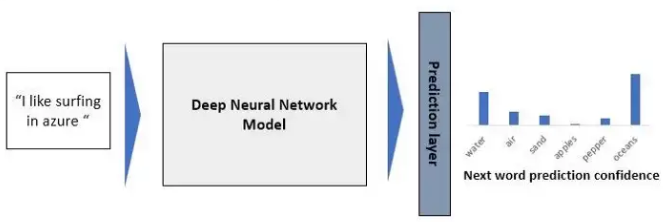

At the moment, the most popular NLP model architecture is the Transformer. 
This architecture builds very deep sets of relationships between the words in the sentence, creating a very rich numerical representation of each sentence.

This rich representation is fed into the last layer of the model, which is trained to predict the next word in a sentence. This trained model is taken, the last layer is chopped off and a new layer is put in place and just that layer is then trained to predict sentiment quickly. Of course, you can fine-tune the model to answer questions or generate text etc.

HuggingFace offers a Transformers library that makes these models incredibly easy to use. We can load the pre-trained models and use them as such, or fine-tune them for better results. 

### <font color='yellow'>NLP tasks<font>



Sentiment analysis

Question answering

NER

Text summarization

Text generation

Translation



## <font color='pink'>Code<font>



In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 102.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 23.6 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline

### <font color='yellow'>Using HuggingFace Transformers to solve NLP tasks with no fine-tunning<font>



HuggingFace has introduced a concept of pipelines, which are in fact object abstractions of far more complex codes that the library has. They offer an easy way of accessing HuggingFace Transformer models and using them to solve different tasks.



#### <font color='white'>Sentiment analysis<font>



The task of sentiment analysis will classify the text as positive or negative (has positive or negative sentiment). 

The model will give us this classification together with the probability for belongingness to that sentiment class.

The default model for this task is distilbert-base-uncased-finetuned-sst-2-english, which is a smaller version of the BERT model, trained on uncased English words.

In [ ]:
nlp = pipeline("sentiment-analysis")

print(nlp("I hate you"))
print(nlp("I love you"))

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'NEGATIVE', 'score': 0.9991129040718079}]
[{'label': 'POSITIVE', 'score': 0.9998656511306763}]


In [ ]:
print(nlp("I am in love with mathematics"))

[{'label': 'POSITIVE', 'score': 0.999725878238678}]


In [ ]:
print(nlp("Today is a bad day"))

[{'label': 'NEGATIVE', 'score': 0.999760091304779}]


#### <font color='white'>Question answering<font>



Extractive Question Answering is a task that answers questions given a certain text to learn from (the text contains the answers).

The result we get is the answer, as well as the 'start' and 'end' values of the position of the answer within the text.

In [ ]:
nlp = pipeline("question-answering")

context = r"""
Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
a model on a SQuAD task, you may leverage the `run_squad.py`.
"""

print(nlp(question="What is extractive question answering?", context=context))
print(nlp(question="What is a good example of a question answering dataset?", context=context))

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/261M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.6222442984580994, 'start': 34, 'end': 95, 'answer': 'the task of extracting an answer from a text given a question'}
{'score': 0.5115317106246948, 'start': 147, 'end': 160, 'answer': 'SQuAD dataset'}


In [ ]:
context = r"""
Today is a very sunny day. The sun has been shining from 8 am until now. I am very happy because of that.
"""

print(nlp(question="Is it sunny today?", context=context))

{'score': 0.23926804959774017, 'start': 1, 'end': 26, 'answer': 'Today is a very sunny day'}


#### <font color='white'>NER<font>



Named Entity Recognition (NER) is a task that classifies tokens, identifying them as person, organization etc.

Categories:

> O: Outside of a named entity

> B-MIS: Beginnging of a miscellaneous entity right after another miscellaneous entity

> I-MIS: Miscellaneous entity

> B-PER: Beginning of a person's name right afer another person's name

> I-PER: Person's name

> B-ORG: Beginning of an organisation right after another organisation

> I-ORG: Organisation

> B-LOC: Beginning of a location right after another location

> I-LOC: Location

In [ ]:
nlp = pipeline("ner")

sequence = "Hugging Face Inc. is a company based in New York City. Its headquarters are in DUMBO, therefore very" \
           "close to the Manhattan Bridge which is visible from the window."

print(nlp(sequence))

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

[{'entity': 'I-ORG', 'score': 0.9995635, 'index': 1, 'word': 'Hu', 'start': 0, 'end': 2}, {'entity': 'I-ORG', 'score': 0.99159384, 'index': 2, 'word': '##gging', 'start': 2, 'end': 7}, {'entity': 'I-ORG', 'score': 0.99826705, 'index': 3, 'word': 'Face', 'start': 8, 'end': 12}, {'entity': 'I-ORG', 'score': 0.9994404, 'index': 4, 'word': 'Inc', 'start': 13, 'end': 16}, {'entity': 'I-LOC', 'score': 0.99943465, 'index': 11, 'word': 'New', 'start': 40, 'end': 43}, {'entity': 'I-LOC', 'score': 0.99932706, 'index': 12, 'word': 'York', 'start': 44, 'end': 48}, {'entity': 'I-LOC', 'score': 0.9993864, 'index': 13, 'word': 'City', 'start': 49, 'end': 53}, {'entity': 'I-LOC', 'score': 0.9825622, 'index': 19, 'word': 'D', 'start': 79, 'end': 80}, {'entity': 'I-LOC', 'score': 0.93698275, 'index': 20, 'word': '##UM', 'start': 80, 'end': 82}, {'entity': 'I-LOC', 'score': 0.89870965, 'index': 21, 'word': '##BO', 'start': 82, 'end': 84}, {'entity': 'I-LOC', 'score': 0.97582406, 'index': 29, 'word': 'Man

In [ ]:
sequence = "FCSE is a faculty that is based in Skopje, North Macedonia, established in 2011."

print(nlp(sequence))

[{'entity': 'I-ORG', 'score': 0.9978167, 'index': 1, 'word': 'FC', 'start': 0, 'end': 2}, {'entity': 'I-ORG', 'score': 0.98921704, 'index': 2, 'word': '##SE', 'start': 2, 'end': 4}, {'entity': 'I-LOC', 'score': 0.99920315, 'index': 10, 'word': 'S', 'start': 35, 'end': 36}, {'entity': 'I-LOC', 'score': 0.9981351, 'index': 11, 'word': '##ko', 'start': 36, 'end': 38}, {'entity': 'I-LOC', 'score': 0.98211366, 'index': 12, 'word': '##p', 'start': 38, 'end': 39}, {'entity': 'I-LOC', 'score': 0.9982169, 'index': 13, 'word': '##je', 'start': 39, 'end': 41}, {'entity': 'I-LOC', 'score': 0.996287, 'index': 15, 'word': 'North', 'start': 43, 'end': 48}, {'entity': 'I-LOC', 'score': 0.99843556, 'index': 16, 'word': 'Macedonia', 'start': 49, 'end': 58}]


#### <font color='white'>Text summarization<font>



Text summarization is a task for summarization of a bigger into a smaller text with the kept meaning.

The default model in this case is the Bart model.

In [ ]:
summarizer = pipeline("summarization")

ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

print(summarizer(ARTICLE, max_length=130, min_length=30))

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

[{'summary_text': ' Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002 . At one time, she was married to eight men at once, prosecutors say .'}]


#### <font color='white'>Text generation<font>



Text generation is a task for creating a coherent text which is a continuation of a given starting text.


In [ ]:
text_generator = pipeline("text-generation")
print(text_generator("As far as I am concerned, I will", max_length=50))

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "As far as I am concerned, I will wait for the game's release. It's a great game, so I want it to be one of those new games for PlayStation. It'll probably be one of those games that Nintendo sells and tries to"}]


In [ ]:
print(text_generator("As far as I am concerned, I will", max_length=50))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'As far as I am concerned, I will leave you with my personal opinions.\n\n\nYou were born into a family that was deeply religious and was very loyal to your grandparents.\n\n\nYou have a large family that was very loyal to her father'}]


In [ ]:
print(text_generator("As far as I am concerned, I will", max_length=50))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "As far as I am concerned, I will give up now.\n\nI'm still wondering how you could have done this to us, but I'm sure our first responders will be doing the same as always.\n\n\nNow, my fellow Texans"}]


#### <font color='white'>Text translation<font>



In [ ]:
translator = pipeline("translation_en_to_fr")
print(translator("Hugging Face is a technology company based in New York and Paris", max_length=40))

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/892M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/792k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


[{'translation_text': 'Hugging Face est une entreprise technologique basée à New York et à Paris.'}]


In [ ]:
translator = pipeline("translation_en_to_de")
print(translator("Hugging Face is a technology company based in New York and Paris", max_length=40))

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'translation_text': 'Hugging Face ist ein Technologieunternehmen mit Sitz in New York und Paris.'}]


### <font color='yellow'>Using HuggingFace Transformers to solve the task of text classification with fine-tunning<font>



Transformers provides a Trainer class to help you fine-tune any of the pretrained models it provides on your dataset. 

Once you’ve done all the data preprocessing work, you have just a few steps left to define the Trainer. Use GPU for this process.

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding

raw_datasets = load_dataset("glue", "mrpc")

Generating train split:   0%|          | 0/3668 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/408 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1725 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/mrpc/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
raw_datasets.column_names

{'train': ['sentence1', 'sentence2', 'label', 'idx'],
 'validation': ['sentence1', 'sentence2', 'label', 'idx'],
 'test': ['sentence1', 'sentence2', 'label', 'idx']}

In [ ]:
def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
#Note: We first define the TrainingArguments, and we will only specify the directory where the trained model will be saved.
from transformers import TrainingArguments

training_args = TrainingArguments("test-trainer")

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
#Note: BERT has not been pretrained on classifying pairs of sentences, so the head of the pretrained model has been discarded.
#Note: A new head suitable for this task has been added instead and therefore some weights were not used, and some new were initialised.

from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
)

In [ ]:
#Note: Train will start the process of fine-tuning - always run on GPU.

trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 3668
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1377
  Number of trainable parameters = 109483778
The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence1, idx, sentence2. If sentence1, idx, sentence2 are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__cal

Step,Training Loss
500,0.495100
1000,0.275000


Saving model checkpoint to test-trainer/checkpoint-500
Configuration saved in test-trainer/checkpoint-500/config.json
Model weights saved in test-trainer/checkpoint-500/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-500/tokenizer_config.json
Special tokens file saved in test-trainer/checkpoint-500/special_tokens_map.json
Saving model checkpoint to test-trainer/checkpoint-1000
Configuration saved in test-trainer/checkpoint-1000/config.json
Model weights saved in test-trainer/checkpoint-1000/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-1000/tokenizer_config.json
Special tokens file saved in test-trainer/checkpoint-1000/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=1377, training_loss=0.31612325320662843, metrics={'train_runtime': 209.327, 'train_samples_per_second': 52.568, 'train_steps_per_second': 6.578, 'total_flos': 406183858377360.0, 'train_loss': 0.31612325320662843, 'epoch': 3.0})

In [ ]:
#Note: The output of the prediction is another tuple with three fields: predictions, label_ids, metrics. 

predictions = trainer.predict(tokenized_datasets["validation"])
print(predictions.predictions.shape, predictions.label_ids.shape)

***** Running Prediction *****
  Num examples = 408
  Batch size = 8
The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence1, idx, sentence2. If sentence1, idx, sentence2 are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.


(408, 2) (408,)


In [ ]:
#Note: To transform into predictions that we can compare to our labels, we need to take the index with the maximum value on the second axis.
import numpy as np

preds = np.argmax(predictions.predictions, axis=-1)

In [ ]:
#Note: We can now compare those predictions to the labels. To build our compute_metric() function, we will rely on the metrics from the evaluate library.

import evaluate

metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=preds, references=predictions.label_ids)

{'accuracy': 0.8357843137254902, 'f1': 0.8858603066439524}

In [ ]:
def compute_metrics(eval_preds):
    metric = evaluate.load("glue", "mrpc")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
training_args = TrainingArguments("test-trainer", evaluation_strategy="epoch")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embeddi

In [ ]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 3668
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1377
  Number of trainable parameters = 109483778
The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence1, idx, sentence2. If sentence1, idx, sentence2 are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.365379,0.835784,0.884283
2,0.533500,0.435071,0.850490,0.898164
3,0.340100,0.565466,0.855392,0.900840


***** Running Evaluation *****
  Num examples = 408
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence1, idx, sentence2. If sentence1, idx, sentence2 are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
Saving model checkpoint to test-trainer/checkpoint-500
Configuration saved in test-trainer/checkpoint-500/config.json
Model weights saved in test-trainer/checkpoint-500/pytorch_model.bin
tokenizer config file saved in test-trainer/checkpoint-500/tokenizer_config.json
Special tokens file saved in test-trainer/checkpoint-500/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 408
  Batch size = 8
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence1, idx, sentence2. If sentence1, idx, sentence2 are not exp

TrainOutput(global_step=1377, training_loss=0.3655698079515733, metrics={'train_runtime': 216.3442, 'train_samples_per_second': 50.863, 'train_steps_per_second': 6.365, 'total_flos': 406183858377360.0, 'train_loss': 0.3655698079515733, 'epoch': 3.0})

In [ ]:
predictions = trainer.predict(tokenized_datasets["validation"])
print(predictions.predictions.shape, predictions.label_ids.shape)

preds = np.argmax(predictions.predictions, axis=-1)

metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=preds, references=predictions.label_ids)

***** Running Prediction *****
  Num examples = 408
  Batch size = 8
The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: sentence1, idx, sentence2. If sentence1, idx, sentence2 are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.


(408, 2) (408,)


{'accuracy': 0.8553921568627451, 'f1': 0.9008403361344538}